In [1]:
from fastai.vision import *

In [2]:
torch.cuda.set_device(0)

PATH = "/home/weilun/Documents/Proj/data/"

In [3]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, bs=64, size=256)
data.normalize()
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4)
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time
0,3.289159,2.653386,0.201681,00:17
1,2.358474,1.268371,0.663866,00:16
2,1.735819,0.838404,0.781513,00:15
3,1.375916,0.768952,0.806723,00:15


[('Krishnamoorthi Karthick', 'Mathiyazhan Anandhamurugan', 2),
 ('Mathiyazhan Anandhamurugan', 'Bhuiya Hasan', 2),
 ('Nagarethinam Arivazhagan', 'Ganesan Dharmalinga', 2)]

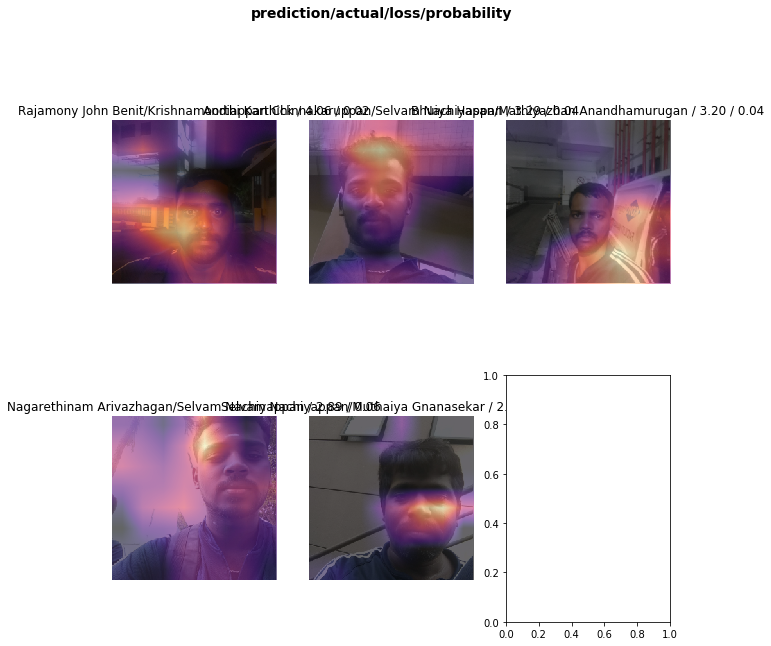

In [4]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5, figsize=(10,10))
interp.most_confused(min_val=2)

In [5]:
learn.unfreeze()
learn.fit_one_cycle(1)
learn.load('stage-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.534558,0.798771,0.781513,00:16


Learner(data=ImageDataBunch;

Train: LabelList (487 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Alagu Ilayaraja,Alagu Ilayaraja,Alagu Ilayaraja,Alagu Ilayaraja,Alagu Ilayaraja
Path: /home/weilun/Documents/Proj/data;

Valid: LabelList (119 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Alagu Ilayaraja,Alagu Ilayaraja,Alagu Ilayaraja,Alagu Ilayaraja,Alagu Ilayaraja
Path: /home/weilun/Documents/Proj/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kerne

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


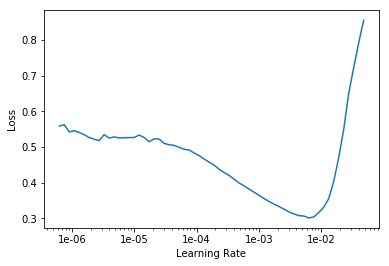

In [6]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(20, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.531624,0.690199,0.831933,00:16
1,0.442609,0.564164,0.857143,00:16
2,0.365911,0.397186,0.890756,00:16
3,0.290754,0.313025,0.882353,00:16
4,0.234645,0.335441,0.882353,00:16
5,0.189477,0.222845,0.915966,00:16
6,0.155684,0.175076,0.949580,00:16
7,0.129192,0.120952,0.966387,00:16
8,0.108715,0.105032,0.966387,00:16
9,0.092930,0.081638,0.983193,00:16


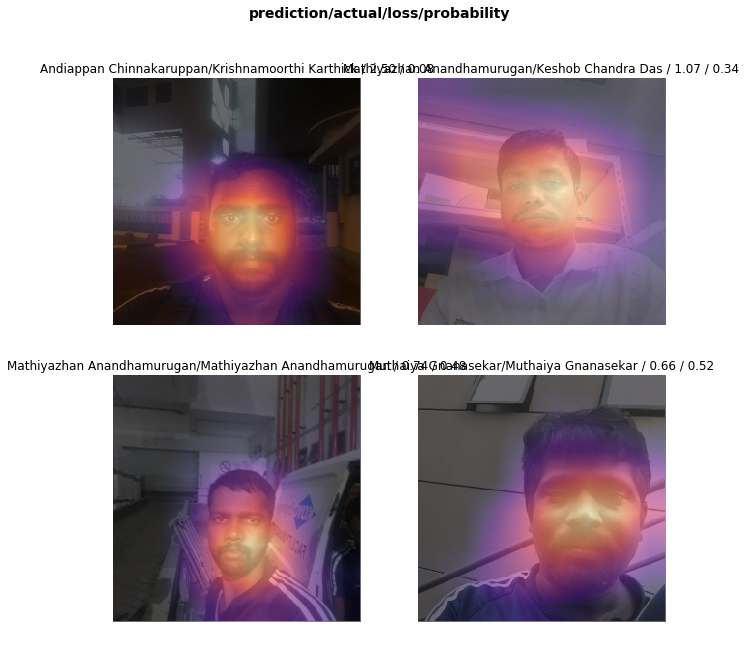

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(10,10))

In [11]:
learn.save('stage-2', return_path=True)

PosixPath('/home/weilun/Documents/Proj/data/models/stage-2.pth')